<a href="https://colab.research.google.com/github/akinlex/classification-problems/blob/main/Employee_retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
steps_to_take = [
    "1. Getting the data ready",
    "2. Exploratory data analysis",
    "3. Choose the right estimator/algorithm for our problems",
    "4. Fit the model/algorithm and use it to make predictions on our data",
    "5. Evaluating a model",
    "6. Improve a model",
    "7. Save and load a trained model"
]

# 1. Getting the data ready

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# You have to include the full link to the csv file containing your dataset
employee_df = pd.read_csv('/content/drive/MyDrive/Human_Resources.csv')
# !ls '/content/drive/MyDrive/ Human_Resources.csv'
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# Let's replace 'Attritition' , 'overtime' , 'Over18' column with integers before performing any visualizations 

employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x:1 if x =='Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x:1 if x =='Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x:1 if x =='Y' else 0)

In [8]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
# Let's see if we have any missing data, luckily we don't!
employee_df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

# 2. Exploratory data analysis

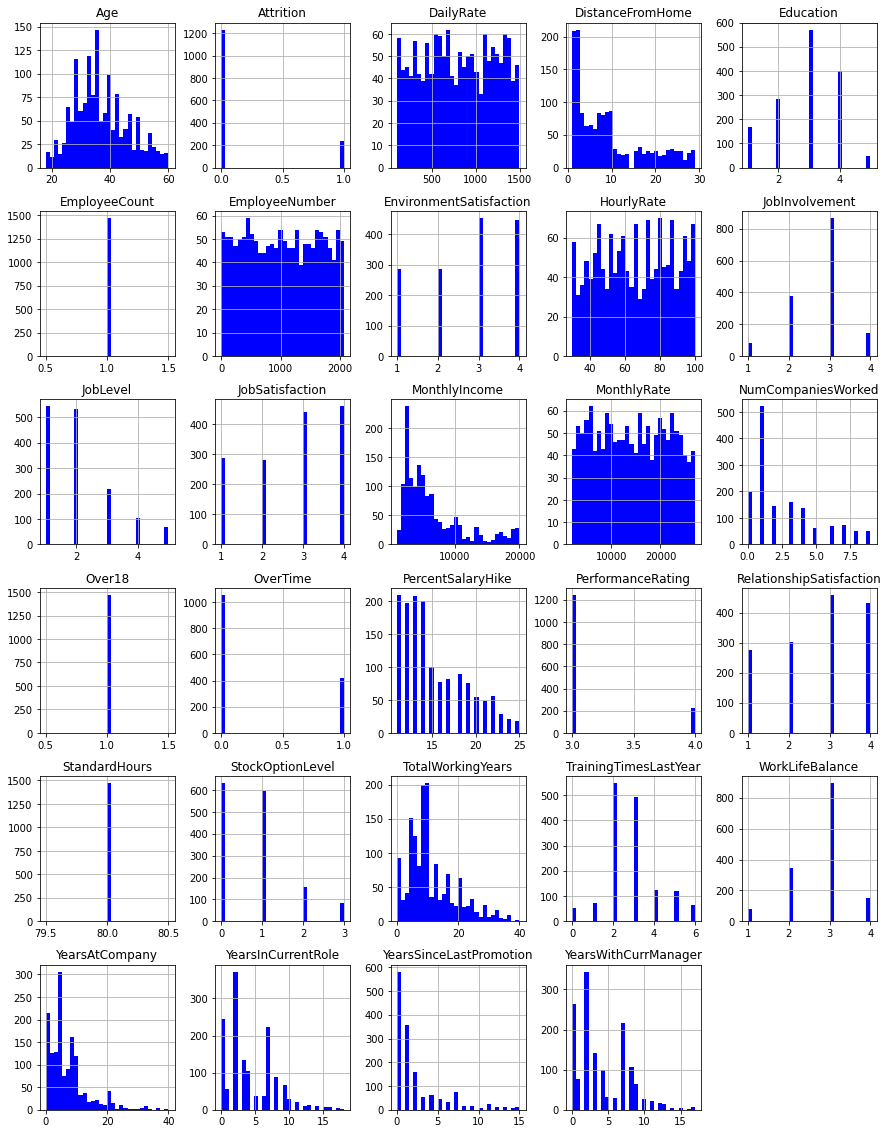

In [10]:
employee_df.hist(bins=30, figsize=(15, 20), color='b');
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
# It makes sense to drop 'EmployeeCount' and 'Standardhours' since they do not change from one employee to the other

In [11]:
# It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [12]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [13]:
# Let's see how many employees left the company! 
emp_left_df = employee_df[employee_df['Attrition'] == 1]
emp_stayed_df = employee_df[employee_df['Attrition'] == 0]

In [14]:
print(f"Total number of employee {employee_df['Attrition'].count()}")
print(f"Employees who left the company {len(emp_left_df)}")
print(f"Employees who left the company in % {len(emp_left_df) / len(employee_df['Attrition']) * 100 }")
print(f"Employees who is still at the company {len(emp_stayed_df)}")
print(f"Employees who is still at the company in % {len(emp_stayed_df) / len(employee_df['Attrition']) * 100 }")

Total number of employee 1470
Employees who left the company 237
Employees who left the company in % 16.122448979591837
Employees who is still at the company 1233
Employees who is still at the company in % 83.87755102040816


In [15]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset 
emp_left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [16]:
emp_stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


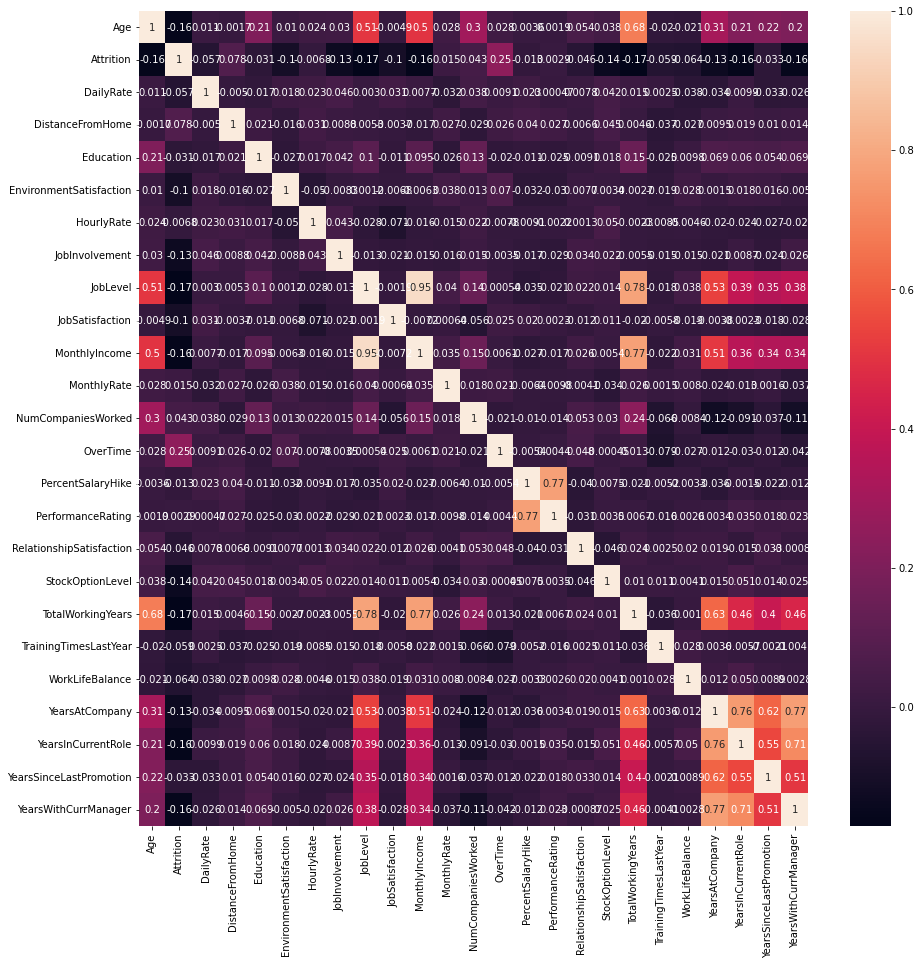

In [17]:
# Get the correlation
corr = employee_df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, annot=True);

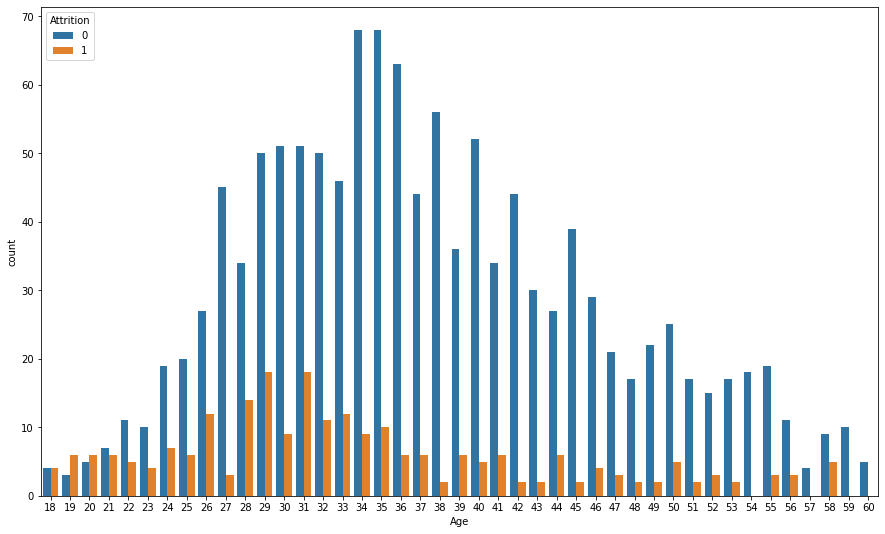

In [18]:
plt.figure(figsize=(15, 9))
sns.countplot(x='Age', hue='Attrition', data=employee_df);

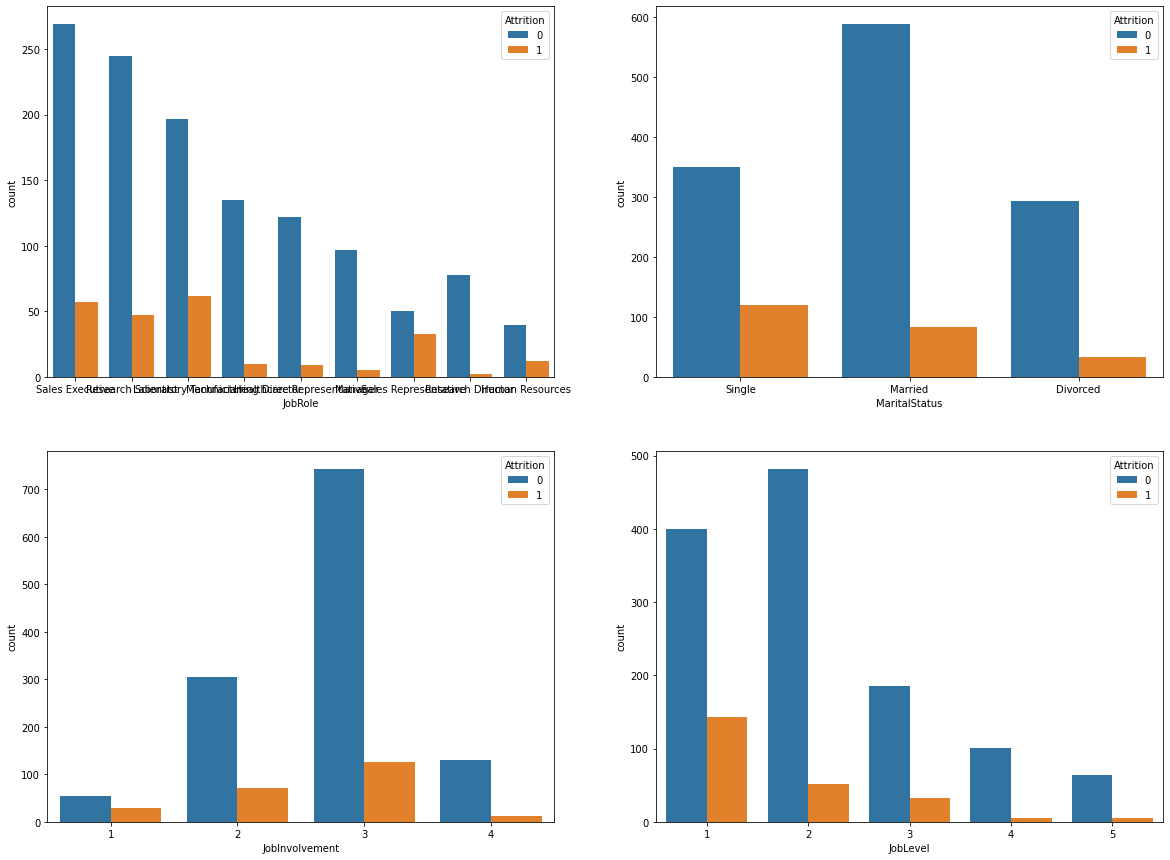

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(20, 15), nrows=2, ncols=2)
sns.countplot(ax=ax1, x='JobRole', hue='Attrition', data=employee_df)
sns.countplot(ax=ax2, x='MaritalStatus', hue='Attrition', data=employee_df)
sns.countplot(ax=ax3, x='JobInvolvement', hue='Attrition', data=employee_df)
sns.countplot(ax=ax4, x='JobLevel', hue='Attrition', data=employee_df)

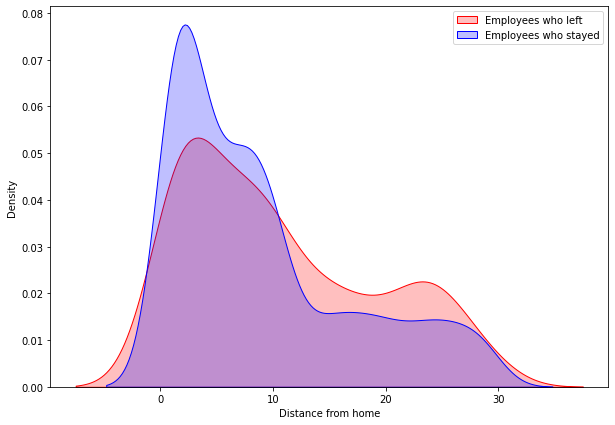

In [20]:
# Analysis on continuous variable
plt.figure(figsize=(10,7))
sns.kdeplot(emp_left_df['DistanceFromHome'], label='Employees who left', shade=True, color='r')
sns.kdeplot(emp_stayed_df['DistanceFromHome'], label='Employees who stayed', shade=True, color='b')
plt.xlabel('Distance from home')
plt.legend();

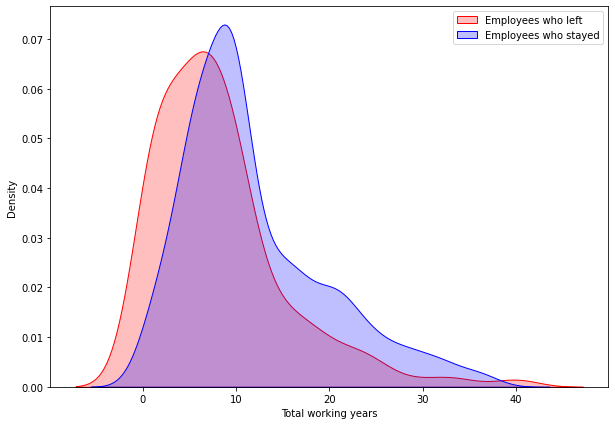

In [21]:
plt.figure(figsize=(10,7))
sns.kdeplot(emp_left_df['TotalWorkingYears'], label='Employees who left', shade=True, color='r')
sns.kdeplot(emp_stayed_df['TotalWorkingYears'], label='Employees who stayed', shade=True, color='b')
plt.xlabel('Total working years')
plt.legend();

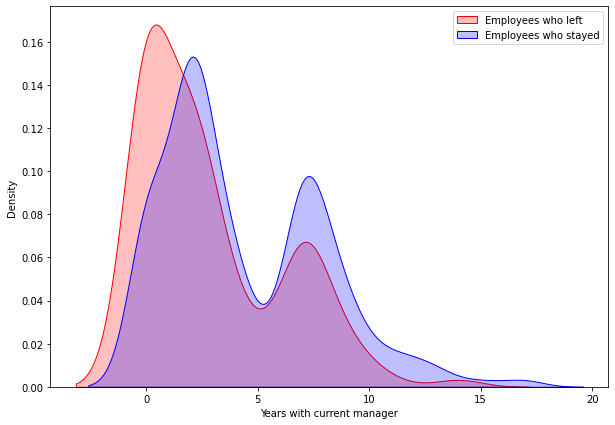

In [22]:
plt.figure(figsize=(10,7))
sns.kdeplot(emp_left_df['YearsWithCurrManager'], label='Employees who left', shade=True, color='r')
sns.kdeplot(emp_stayed_df['YearsWithCurrManager'], label='Employees who stayed', shade=True, color='b')
plt.xlabel('Years with current manager')
plt.legend();

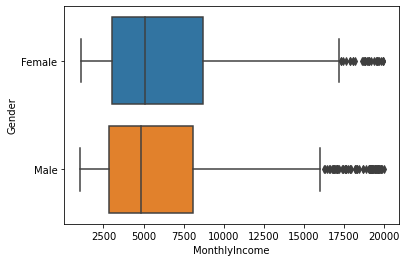

In [23]:
sns.boxplot(x='MonthlyIncome', y='Gender', data=employee_df);

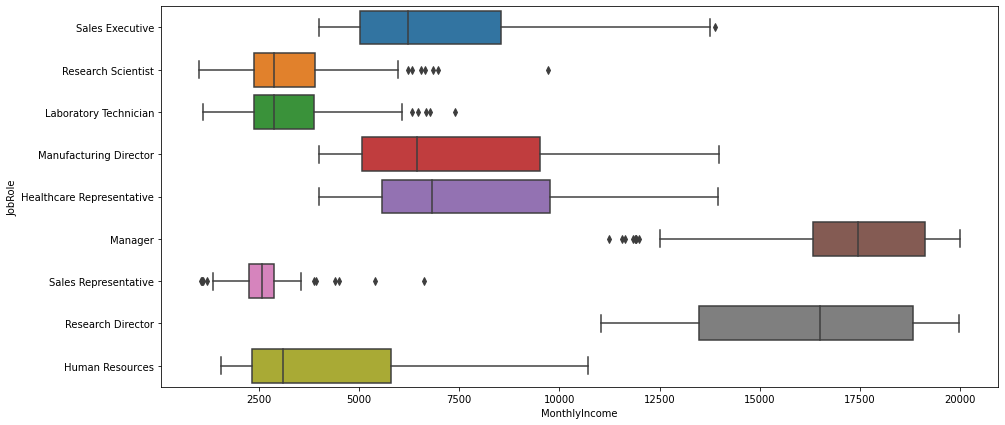

In [24]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df);

In [25]:
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# 1.1. More data wrangling

In [26]:
employee_df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [27]:
cat_data = employee_df[['Department', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
cat_data = onehotencoder.fit_transform(cat_data).toarray()
cat_data

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [28]:
# Put it in a dataframe
cat_data = pd.DataFrame(cat_data)

In [29]:
# Concatenate num features and cat features 
num_data = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
final_df = pd.concat([num_data, cat_data], axis=1)
final_df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,16,17,18,19,20,21,22,23,24,25
0,41,1102,1,2,2,94,3,2,4,5993,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,279,8,1,3,61,2,2,2,5130,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1373,2,2,4,92,2,1,3,2090,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,1392,3,4,4,56,3,1,3,2909,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,591,2,1,1,40,3,1,2,3468,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   DailyRate                 1470 non-null   int64  
 2   DistanceFromHome          1470 non-null   int64  
 3   Education                 1470 non-null   int64  
 4   EnvironmentSatisfaction   1470 non-null   int64  
 5   HourlyRate                1470 non-null   int64  
 6   JobInvolvement            1470 non-null   int64  
 7   JobLevel                  1470 non-null   int64  
 8   JobSatisfaction           1470 non-null   int64  
 9   MonthlyIncome             1470 non-null   int64  
 10  MonthlyRate               1470 non-null   int64  
 11  NumCompaniesWorked        1470 non-null   int64  
 12  OverTime                  1470 non-null   int64  
 13  PercentSalaryHike         1470 non-null   int64  
 14  Performa

## Modelling

In [31]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(final_df)
y = employee_df['Attrition']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models = {
    'LogisticRegression':LogisticRegression(),
    'RandomForestClassifier':RandomForestClassifier()
}

# Fit and train model function
def fit_and_train(models, x_train, x_test, y_train, y_test):
    np.random.seed(40)
    score = {}
    for k,model in models.items():
        model.fit(x_train, y_train)
        # data |= {'Linear Regression': } python 3.9
        score[model] = model.score(x_test, y_test)
    return score

In [34]:
model_scores = fit_and_train(models, X_train, X_test, y_train, y_test)
model_scores

{LogisticRegression(): 0.9103260869565217,
 RandomForestClassifier(): 0.8559782608695652}

In [35]:
lr_y_preds = list(model_scores)[0].predict(X_test)
lr_y_preds[:30]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
rfc_y_preds = list(model_scores)[1].predict(X_test)
rfc_y_preds[:30]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

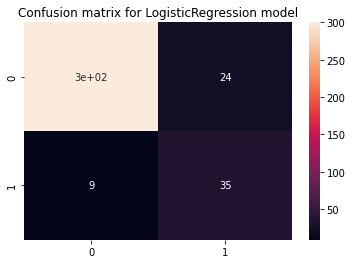

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, RocCurveDisplay, roc_curve, auc
cm = confusion_matrix(lr_y_preds, y_test)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix for LogisticRegression model");

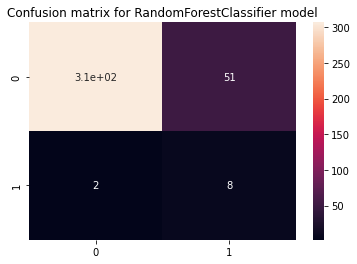

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(rfc_y_preds, y_test)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix for RandomForestClassifier model");

In [39]:
print(classification_report(y_test, lr_y_preds))
print('Classification report for LogisticRegression model')

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       309
           1       0.80      0.59      0.68        59

    accuracy                           0.91       368
   macro avg       0.86      0.78      0.81       368
weighted avg       0.91      0.91      0.90       368

Classification report for LogisticRegression model


In [40]:
print(classification_report(y_test, rfc_y_preds))
print('Classification report for RandomForestClassifier model')

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       309
           1       0.80      0.14      0.23        59

    accuracy                           0.86       368
   macro avg       0.83      0.56      0.58       368
weighted avg       0.85      0.86      0.81       368

Classification report for RandomForestClassifier model


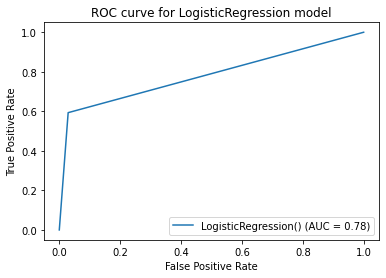

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, lr_y_preds)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=list(model_scores)[0])
display.plot()
plt.title("ROC curve for LogisticRegression model");

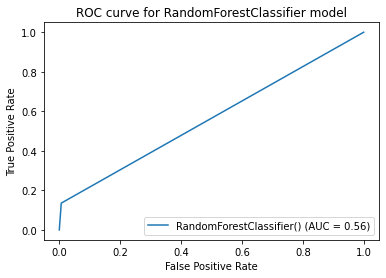

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, rfc_y_preds)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=list(model_scores)[1])
display.plot()
plt.title("ROC curve for RandomForestClassifier model");

In [43]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50,)))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
23/23 [==============================] - 1s 12ms/step - loss: 0.4367 - accuracy: 0.8203
Epoch 2/100
23/23 [==============================] - 0s 11ms/step - loss: 0.3534 - accuracy: 0.8630
Epoch 3/100
23/23 [==============================] - 0s 12ms/step - loss: 0.3148 - accuracy: 0.8721
Epoch 4/100
23/23 [==============================] - 0s 12ms/step - loss: 0.2774 - accuracy: 0.8984
Epoch 5/100
23/23 [==============================] - 0s 12ms/step - loss: 0.2377 - accuracy: 0.9111
Epoch 6/100
23/23 [==============================] - 0s 12ms/step - loss: 0.2061 - accuracy: 0.9256
Epoch 7/100
23/23 [==============================] - 0s 12ms/step - loss: 0.1856 - accuracy: 0.9265
Epoch 8/100
23/23 [==============================] - 0s 12ms/step - loss: 0.1573 - accuracy: 0.9401
Epoch 9/100
23/23 [==============================] - 0s 12ms/step - loss: 0.1110 - accuracy: 0.9546
Epoch 10/100
23/23 [==============================] - 0s 11ms/step - loss: 0.0872 - accuracy: 0.9682

In [47]:
ann_y_preds = model.predict(X_test)
ann_y_preds = (ann_y_preds>0.5)
ann_y_preds[:5]

array([[ True],
       [ True],
       [False],
       [False],
       [False]])

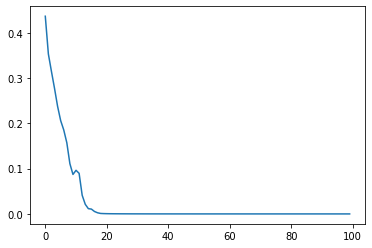

In [48]:
plt.plot(epochs_hist.history['loss']);

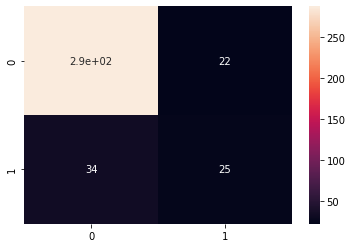

In [49]:
cm = confusion_matrix(y_test, ann_y_preds)
sns.heatmap(cm, annot=True);

In [50]:
print(classification_report(ann_y_preds, y_test))

              precision    recall  f1-score   support

       False       0.93      0.89      0.91       321
        True       0.42      0.53      0.47        47

    accuracy                           0.85       368
   macro avg       0.68      0.71      0.69       368
weighted avg       0.86      0.85      0.85       368



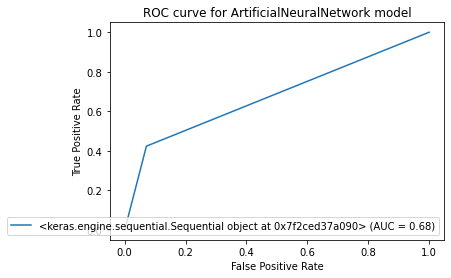

In [55]:
fpr, tpr, thresholds = roc_curve(y_test, ann_y_preds)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model)
display.plot()
plt.title("ROC curve for ArtificialNeuralNetwork model");

Looking at the AUC score not closer to 1, our models performed poor on this dataset, this is because we have an imbalanced dataset or as it were a higly skewed dataset, to further improve the performance, we need to gather more data